Import


In [1]:
# 1. Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exemple d'utilisation

In [29]:

# Configurer les options d'affichage de pandas pour une meilleure lisibilité
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 2. Charger les fichiers CSV
team_stats = pd.read_csv('../data/teams_stats/NBA-Team-Regular-Season-Stats-2001-02.csv')
team_stats_differential = pd.read_csv('../data/teams_stats_differential/NBA-Team-Regular-Season-Stats-2001-02.csv')
team_stats_opponent = pd.read_csv('../data/teams_stats_opponent/NBA-Team-Regular-Season-Stats-2001-02.csv')

# 3. Inspecter les premières lignes des données
print("Premières lignes de team_stats:")
print(team_stats.head())

print("\nPremières lignes de team_stats_differential:")
print(team_stats_differential.head())

print("\nPremières lignes de team_stats_regular_season:")
print(team_stats_opponent.head())



Premières lignes de team_stats:
   Rank               Team Name  GP    PTS   FGM   FGA   FG%  3PM   3PA   3P%  \
0     1        Dallas Mavericks  82  105.2  39.0  84.5  46.2  7.6  20.1  37.8   
1     2        Sacramento Kings  82  104.6  39.8  85.4  46.7  5.2  14.1  36.7   
2     3      Los Angeles Lakers  82  101.3  38.4  83.4  46.1  6.2  17.5  35.4   
3     4           Orlando Magic  82  100.5  37.6  84.1  44.8  7.6  20.2  37.3   
4     5  Minnesota Timberwolves  82   99.3  38.7  84.0  46.1  4.8  12.8  37.8   

    FTM   FTA   FT%    OR    DR   REB   AST  STL  BLK    TO    PF  \
0  19.6  24.3  80.6  11.2  31.3  42.5  22.1  7.1  4.8  12.1  22.5   
1  19.7  26.3  75.1  12.4  33.0  45.3  23.9  9.0  4.6  13.8  19.0   
2  18.2  26.1  69.9  12.5  31.8  44.3  23.0  7.6  5.8  12.7  22.2   
3  17.6  23.4  75.4  11.5  29.8  41.2  22.0  8.1  4.7  13.6  20.7   
4  17.1  21.4  79.8  12.9  31.2  44.2  24.3  6.4  5.2  13.4  21.2   

                                   Title  
0  NBA Team Regular Sea

In [40]:

print(i)

0


### Verification  des données : valeures null /  doublons 


In [6]:
import pandas as pd
import os

# Dictionnaire pour stocker les chemins des fichiers
file_paths = {
    "team_stats": "../data/teams_stats/NBA-Team-Regular-Season-Stats-{}.csv",
    "team_stats_differential": "../data/teams_stats_differential/NBA-Team-Regular-Season-Stats-{}.csv",
    "team_stats_opponent": "../data/teams_stats_opponent/NBA-Team-Regular-Season-Stats-{}.csv"
}

# Fonction pour vérifier les problèmes dans les données
def check_data_problems(file_path_template, start_year=2001, end_year=2023):
    for year in range(start_year, end_year + 1):
        year_str = f"{year}-{str(year + 1)[-2:]}"  # Format des années ex: 2001-02
        file_path = file_path_template.format(year_str)
        
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            continue
        
        # Charger les données
        df = pd.read_csv(file_path)
        
        # Initialiser une liste pour stocker les problèmes
        problems = []
        
        # Valeurs manquantes
        missing_values = df.isnull().sum()
        if missing_values.any():
            problems.append(f"Missing values:\n{missing_values[missing_values > 0]}")
        
        # Doublons
        duplicated_count = df.duplicated().sum()
        if duplicated_count > 0:
            problems.append(f"Duplicated rows: {duplicated_count}")
        
        
        # Si des problèmes ont été trouvés, les imprimer
        if problems:
            print(f"\nProblems in file {file_path}:")
            for problem in problems:
                print(problem)

        #

# Vérifier les fichiers team_stats
print("Checking team_stats files")
check_data_problems(file_paths["team_stats"])

# Vérifier les fichiers team_stats_differential
print("\nChecking team_stats_differential files")
check_data_problems(file_paths["team_stats_differential"])

# Vérifier les fichiers team_stats_opponent
print("\nChecking team_stats_opponent files")
check_data_problems(file_paths["team_stats_opponent"])


Checking team_stats files

Checking team_stats_differential files

Checking team_stats_opponent files


In [43]:
import numbers

def is_numeric(value):
    return isinstance(value, numbers.Number)

In [48]:
import pandas as pd
import os

# Dictionnaire pour stocker les chemins des fichiers
file_paths = {
    "team_stats": "../data/teams_stats/NBA-Team-Regular-Season-Stats-{}.csv",
    "team_stats_differential": "../data/teams_stats_differential/NBA-Team-Regular-Season-Stats-{}.csv",
    "team_stats_opponent": "../data/teams_stats_opponent/NBA-Team-Regular-Season-Stats-{}.csv"
}

# Colonnes à vérifier pour les valeurs numériques
columns_to_check = ['GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
                    'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']

# Fonction pour vérifier les problèmes dans les données
def check_data_problems(file_path_template, start_year=2001, end_year=2023):
    for year in range(start_year, end_year + 1):
        year_str = f"{year}-{str(year + 1)[-2:]}"  # Format des années ex: 2001-02
        file_path = file_path_template.format(year_str)
        
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            continue
        
        # Charger les données
        df = pd.read_csv(file_path)
        
        # Initialiser une liste pour stocker les problèmes
        problems = []
        
        # Valeurs manquantes
        missing_values = df.isnull().sum()
        if missing_values.any():
            problems.append(f"Missing values:\n{missing_values[missing_values > 0]}")
        
        # Doublons
        duplicated_count = df.duplicated().sum()
        if duplicated_count > 0:
            problems.append(f"Duplicated rows: {duplicated_count}")
        
        # Vérifier les colonnes numériques spécifiques
        for column in columns_to_check:
            for value in df[column]:
                if not is_numeric(value):
                    problems.append(f"Non-numeric values in column {column}")


        # Si des problèmes ont été trouvés, les imprimer
        if problems:
            print(f"\nProblems in file {file_path}:")
            for problem in problems:
                print(problem)

# Vérifier les fichiers team_stats
print("Checking team_stats files")
check_data_problems(file_paths["team_stats"])

# Vérifier les fichiers team_stats_differential
print("\nChecking team_stats_differential files")
check_data_problems(file_paths["team_stats_differential"])

# Vérifier les fichiers team_stats_opponent
print("\nChecking team_stats_opponent files")
check_data_problems(file_paths["team_stats_opponent"])


Checking team_stats files

Checking team_stats_differential files

Checking team_stats_opponent files


### Team  stats

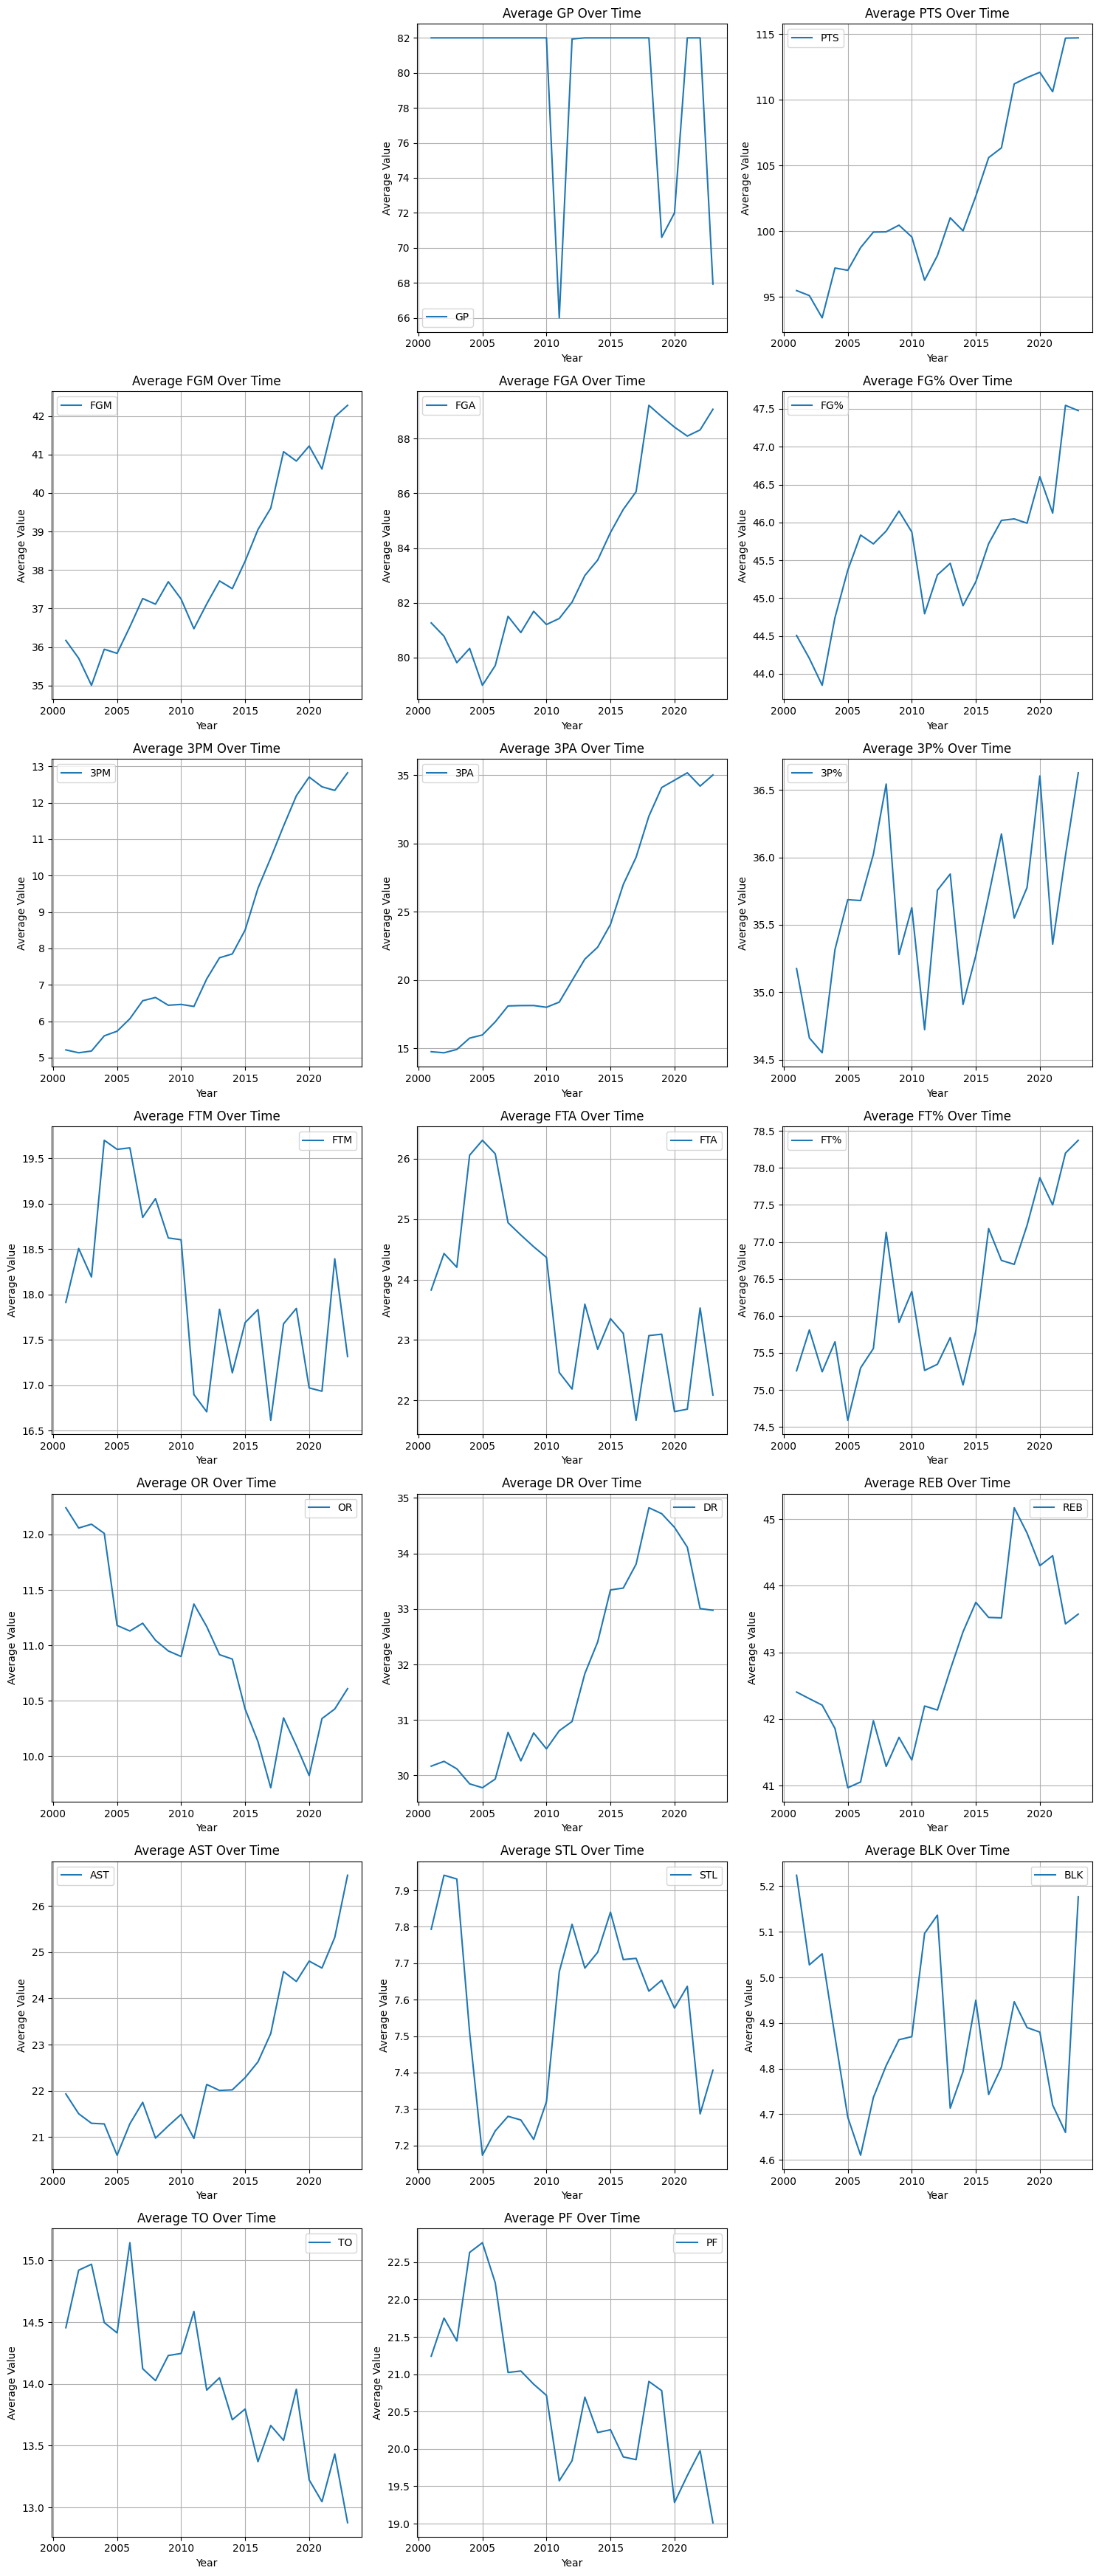

In [52]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer les options d'affichage de pandas pour une meilleure lisibilité
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Fonction pour charger les données de toutes les années et concaténer en un seul DataFrame
def load_all_data(file_path_template, start_year=2001, end_year=2023):
    all_data = []
    for year in range(start_year, end_year + 1):
        year_str = f"{year}-{str(year + 1)[-2:]}"  # Format des années ex: 2001-02
        file_path = file_path_template.format(year_str)
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['Year'] = year
            all_data.append(df)
        else:
            print(f"File not found: {file_path}")
    
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return pd.DataFrame()

# Fonction pour filtrer les colonnes numériques spécifiques
def filter_selected_columns(df, selected_columns):
    return df[selected_columns]

# Fonction pour calculer les statistiques descriptives par année
def descriptive_stats(df, groupby_col='Year'):
    numeric_df = df.select_dtypes(include=[np.number])
    return numeric_df.groupby(groupby_col).agg(['mean', 'median', 'std', 'min', 'max'])

# Fonction pour visualiser chaque variable séparément en grille
def plot_all_variables(df, variables, stat, y_label, title_prefix):
    num_plots = len(variables)
    num_cols = 3  # Nombre de colonnes dans la grille
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculer le nombre de lignes nécessaires
    
    plt.figure(figsize=(15, num_rows * 5))
    
    for i, col in enumerate(variables):
        if (col, stat) in df.columns:
            plt.subplot(num_rows, num_cols, i + 1)
            sns.lineplot(x=df.index, y=df[(col, stat)], label=col)
            plt.title(f"{title_prefix} {col} Over Time")
            plt.xlabel('Year')
            plt.ylabel(y_label)
            plt.legend()
            plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Exemple avec team_stats
# Chemin des fichiers pour team_stats
team_stats_path = "../data/teams_stats/NBA-Team-Regular-Season-Stats-{}.csv"

# Spécifier les colonnes à visualiser
selected_columns = ['Year', 'GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
                    'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']

# Charger les données team_stats
team_stats = load_all_data(team_stats_path)
team_stats = filter_selected_columns(team_stats, selected_columns)
team_stats_desc = descriptive_stats(team_stats)

# Visualiser les colonnes sélectionnées pour team_stats
plot_all_variables(team_stats_desc, selected_columns, 'mean', 'Average Value', 'Average')


### team  stats diffenretia

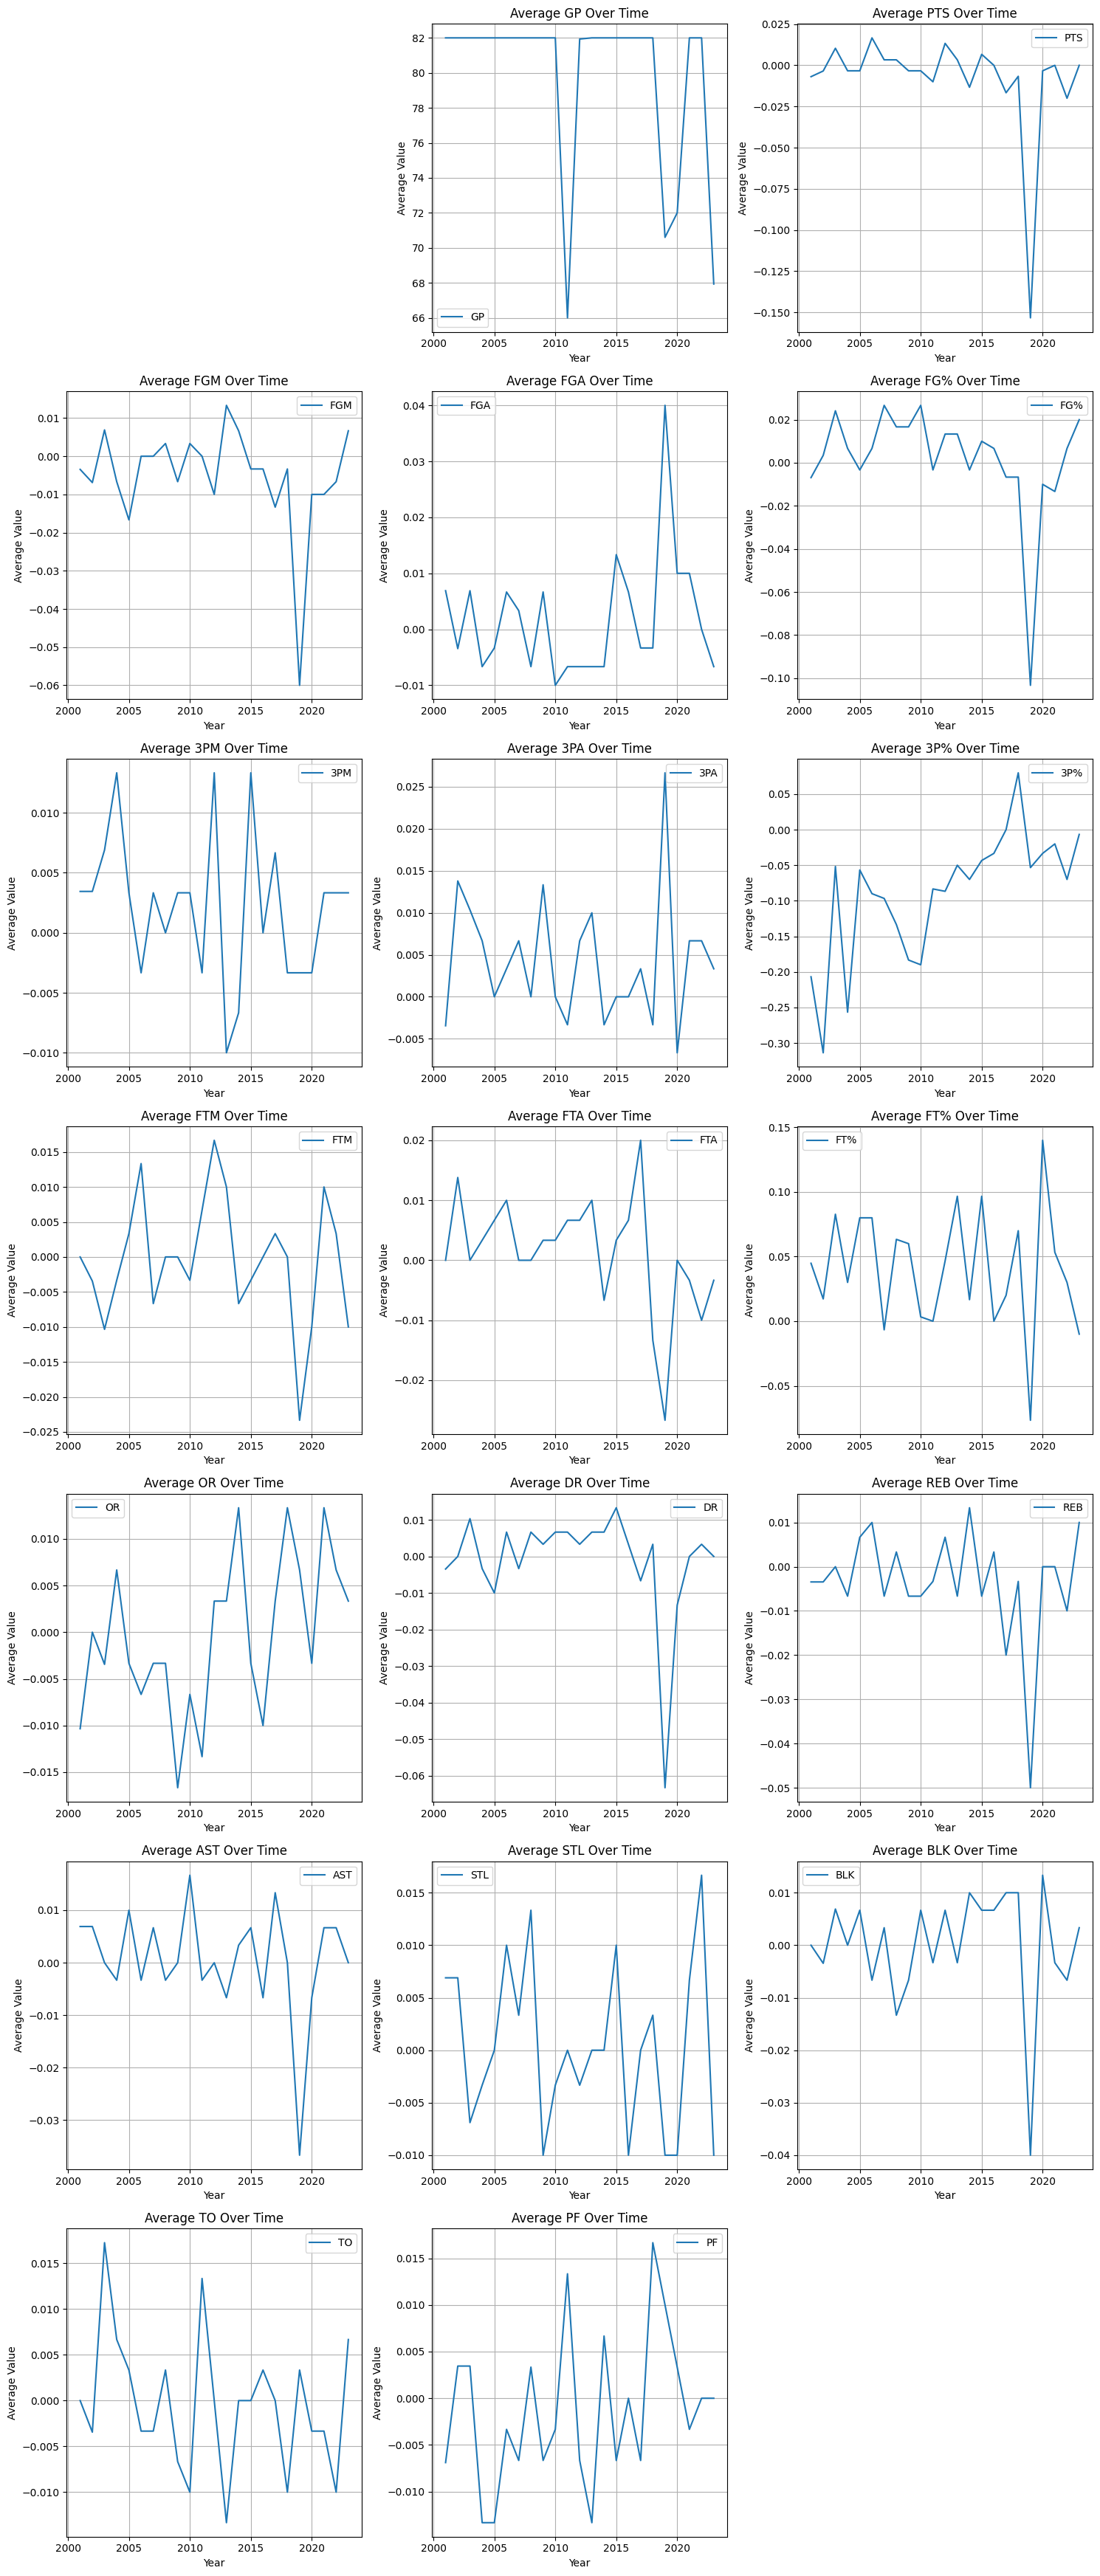

In [55]:
# Exemple avec team_stats
# Chemin des fichiers pour team_stats
team_stats_path = "../data/teams_stats_differential/NBA-Team-Regular-Season-Stats-{}.csv"

# Spécifier les colonnes à visualiser
selected_columns = ['Year', 'GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
                    'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']

# Charger les données team_stats
team_stats = load_all_data(team_stats_path)
team_stats = filter_selected_columns(team_stats, selected_columns)
team_stats_desc = descriptive_stats(team_stats)

# Visualiser les colonnes sélectionnées pour team_stats
plot_all_variables(team_stats_desc, selected_columns, 'mean', 'Average Value', 'Average')